# Seismic Bumps

## Description

The Seismic-Bumps dataset logs whether a high energy seismic bump occured within the following shift where mining activity has taken place.

The column attributes are as follows:

| Column Name | Description |
| - | - |
| seismic | Seismic assessment result {'a': 'lack of hazard', 'b': 'low hazard', 'c': 'high hazard', 'd': 'danger state'} |
| seismoacoustic | Seismoacoustic assessment result {'a': 'lack of hazard', 'b': 'low hazard', 'c': 'high hazard', 'd': 'danger state'} |
| shift_type | Shift type {'W': 'coal-getting', 'N': 'preparation shift'} |
| energy | Seismic energy recorded within previous shift by the most active geophone (GMax) |
| npulse | Number of pulses recorded within the previous shift by the most active geophone (GMax) |
| denergy | Deviation of energy recorded within the previous shift by the most active geophone (GMax) from the average energy recorded during the eight previous shifts |
| dpulse | Deviation of the number of pulses recorded within the previous shift by the most active geophone (GMax) from the average number of pulses recorded during the eight previous shifts |
| hazard | Result of shift seismic hazard assessment in the mine working obtained by the seismoacoustic method based on registration coming from the most active geophone (GMax) only |
| nbumps | Total number of seismic bumps recorded within the previous shift |
| nbumps2 | Number of seismic bumps registered within the previous shift in the [10^2, 10^3) energy range |
| nbumps3 | Number of seismic bumps registered within the previous shift in the [10^3, 10^4) energy range |
| nbumps4 | Number of seismic bumps registered within the previous shift in the [10^4, 10^5) energy range |
| nbumps5 | Number of seismic bumps registered within the previous shift in the [10^5, 10^6) energy range |
| nbumps6 | Number of seismic bumps registered within the previous shift in the [10^6, 10^7) energy range |
| nbumps7 | Number of seismic bumps registered within the previous shift in the [10^7, 10^8) energy range |
| nbumps8 | Number of seismic bumps registered within the previous shift in the [10^8, 10^10) energy range |
| t_energy | Total energy of the seismic bumps registered within the previous shift |
| max_energy | Maximum energy of the seismic bumps registered within the previous shift |
| is_hazardous | Class label 0 ('non-hazardous state', no high energy seismic bumps occured during the next shift) and 1 ('hazardous state', high energy seismic bumps did occur in the next shift) |

[Source](https://archive.ics.uci.edu/ml/datasets/seismic-bumps)

## Importing the Dataset

In [1]:
import pandas as pd
from scipy.io import arff

column_names = ['seismic',
                'seismoacoustic',
                'shift_type',
                'energy',
                'npulse',
                'denergy',
                'dpulse',
                'hazard',
                'nbumps',
                'nbumps2',
                'nbumps3',
                'nbumps4',
                'nbumps5',
                'nbumps6',
                'nbumps7',
                'nbumps8',
                't_energy',
                'max_energy',
                'is_hazardous']

features = column_names[:-1]
target = column_names[-1]

with open("../../datasets/classification/seismic-bumps.arff", "r") as dataset_file:
    raw_data, meta = arff.loadarff(dataset_file)

## Preparing the Dataset

In [2]:
# Convert the raw numpy dataset to a pandas DataFrame. This allows for mixed datatypes within the same multidimensional matrix object.
prepared_data = pd.DataFrame(raw_data.tolist(), columns=column_names)

# Decode integer columns.
prepared_data['energy'] = prepared_data['energy'].astype(int)
prepared_data['npulse'] = prepared_data['npulse'].astype(int)
prepared_data['denergy'] = prepared_data['denergy'].astype(int)
prepared_data['dpulse'] = prepared_data['dpulse'].astype(int)
prepared_data['nbumps'] = prepared_data['nbumps'].astype(int)
prepared_data['nbumps2'] = prepared_data['nbumps2'].astype(int)
prepared_data['nbumps3'] = prepared_data['nbumps3'].astype(int)
prepared_data['nbumps4'] = prepared_data['nbumps4'].astype(int)
prepared_data['nbumps5'] = prepared_data['nbumps5'].astype(int)
prepared_data['nbumps6'] = prepared_data['nbumps6'].astype(int)
prepared_data['nbumps7'] = prepared_data['nbumps7'].astype(int)
prepared_data['nbumps8'] = prepared_data['nbumps8'].astype(int)
prepared_data['t_energy'] = prepared_data['t_energy'].astype(int)
prepared_data['max_energy'] = prepared_data['max_energy'].astype(int)

# Decode integer target column.
prepared_data['is_hazardous'] = prepared_data['is_hazardous'].astype(int)

The following block prints the shape and column datatypes of the processed dataset.

In [3]:
print(prepared_data.shape)
print(prepared_data.dtypes)

(2584, 19)
seismic           object
seismoacoustic    object
shift_type        object
energy             int32
npulse             int32
denergy            int32
dpulse             int32
hazard            object
nbumps             int32
nbumps2            int32
nbumps3            int32
nbumps4            int32
nbumps5            int32
nbumps6            int32
nbumps7            int32
nbumps8            int32
t_energy           int32
max_energy         int32
is_hazardous       int32
dtype: object


## Preprocessing the Dataset

In [4]:
from sklearn.model_selection import train_test_split

X_full = prepared_data[features].copy()
y_full = prepared_data[target].copy()

# Split the dataset into two parts, one part training, the other, testing and valating.
X_train, X_test_and_val, y_train, y_test_and_val = train_test_split(X_full, y_full, 
                                                        train_size=0.6,
                                                        random_state=0)
# Split the second part from the previous split into two parts, one part testing, the other, valating.
X_test, X_val, y_test, y_val = train_test_split(X_test_and_val, y_test_and_val, 
                                                        train_size=0.5,
                                                        random_state=0)

object_cols = ['seismic', 'seismoacoustic', 'shift_type', 'hazard']
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


# Drop categorical columns.
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_test = X_test.select_dtypes(exclude=['object'])
drop_X_val = X_val.select_dtypes(exclude=['object'])

# Apply ordinal encoder to each column with categorical data
OE_X_train = X_train.copy()
OE_X_test = X_test.copy()
OE_X_val = X_val.copy()

ordinal_encoder = OrdinalEncoder()
OE_X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])
OE_X_test[object_cols] = ordinal_encoder.transform(X_test[object_cols])
OE_X_val[object_cols] = ordinal_encoder.transform(X_val[object_cols])

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[object_cols]))
OH_cols_val = pd.DataFrame(OH_encoder.transform(X_val[object_cols]))
# Put back removed index from One-hot encoding
OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index
OH_cols_val.index = X_val.index
# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_test = X_test.drop(object_cols, axis=1)
num_X_val = X_val.drop(object_cols, axis=1)
# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)
OH_X_val = pd.concat([num_X_val, OH_cols_val], axis=1)

## Training on Multiple Classifiers

In [7]:
# Manage imports
import sklearn.linear_model
import sklearn.tree
import sklearn.ensemble
import sklearn.neighbors
import sklearn.naive_bayes
import sklearn.neural_network
from utilities import train_estimators, plot_estimator_scores

### Logistic Regression Classification

Training LogisticRegression(C=1e-05, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.0001, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.001, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.01, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.1, max_iter=10000, random_state=0)...
Training LogisticRegression(C=1.0, max_iter=10000, random_state=0)...
Training LogisticRegression(C=1e-05, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.0001, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.001, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.01, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.1, max_iter=10000, random_state=0)...
Training LogisticRegression(C=1.0, max_iter=10000, random_state=0)...
Training LogisticRegression(C=1e-05, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.0001, max_iter=10000, random_state=0)...

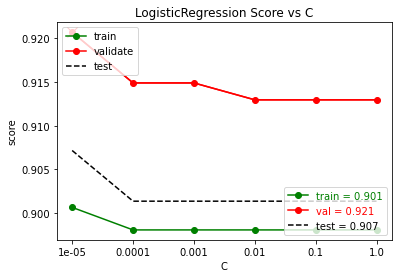

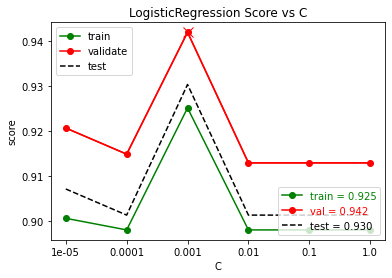

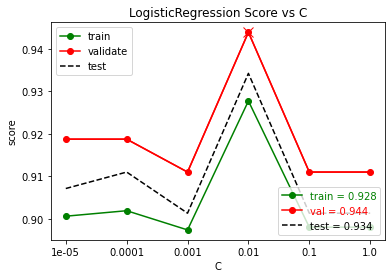

In [6]:
adjusted_parameter = 'C'
adjusted_parameter_values = [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0]

LogisticRegressionEstimators = train_estimators(drop_X_train, y_train,
                                                sklearn.linear_model.LogisticRegression,
                                                adjusted_parameter, adjusted_parameter_values,
                                                max_iter=10000,
                                                random_state=0)
plot_estimator_scores(LogisticRegressionEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        drop_X_train, y_train, drop_X_test, y_test, drop_X_val, y_val)


LogisticRegressionEstimators = train_estimators(OE_X_train, y_train,
                                                sklearn.linear_model.LogisticRegression,
                                                adjusted_parameter, adjusted_parameter_values,
                                                max_iter=10000,
                                                random_state=0)
plot_estimator_scores(LogisticRegressionEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        OE_X_train, y_train, OE_X_test, y_test, OE_X_val, y_val)


LogisticRegressionEstimators = train_estimators(OH_X_train, y_train,
                                                sklearn.linear_model.LogisticRegression,
                                                adjusted_parameter, adjusted_parameter_values,
                                                max_iter=10000,
                                                random_state=0)
plot_estimator_scores(LogisticRegressionEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        OH_X_train, y_train, OH_X_test, y_test, OH_X_val, y_val)

### SVM Classification

Training SVC(C=0.01, gamma=0.0001, max_iter=10000, random_state=0)...
Training SVC(C=0.1, gamma=0.0001, max_iter=10000, random_state=0)...
Training SVC(C=1.0, gamma=0.0001, max_iter=10000, random_state=0)...
Training SVC(C=10.0, gamma=0.0001, max_iter=10000, random_state=0)...
Training SVC(C=100.0, gamma=0.0001, max_iter=10000, random_state=0)...
Training SVC(C=0.01, gamma=0.0001, max_iter=10000, random_state=0)...
Training SVC(C=0.1, gamma=0.0001, max_iter=10000, random_state=0)...
Training SVC(C=1.0, gamma=0.0001, max_iter=10000, random_state=0)...
Training SVC(C=10.0, gamma=0.0001, max_iter=10000, random_state=0)...
Training SVC(C=100.0, gamma=0.0001, max_iter=10000, random_state=0)...
Training SVC(C=0.01, gamma=0.0001, max_iter=10000, random_state=0)...
Training SVC(C=0.1, gamma=0.0001, max_iter=10000, random_state=0)...
Training SVC(C=1.0, gamma=0.0001, max_iter=10000, random_state=0)...
Training SVC(C=10.0, gamma=0.0001, max_iter=10000, random_state=0)...
Training SVC(C=100.0, ga

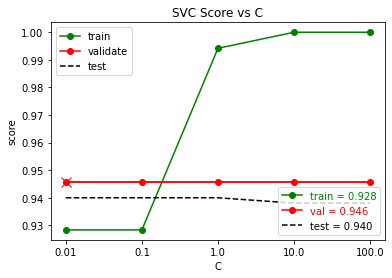

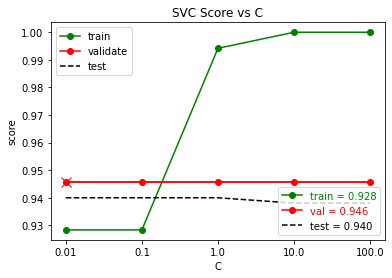

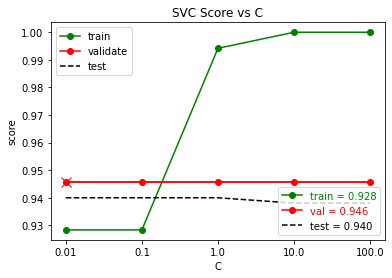

In [7]:
adjusted_parameter = 'C'
adjusted_parameter_values = [0.01, 0.1, 1.0, 10.0, 100.0]

SVMEstimators = train_estimators(drop_X_train, y_train,
                                    sklearn.svm.SVC,
                                    adjusted_parameter, adjusted_parameter_values,
                                    gamma=0.0001,
                                    max_iter=10000,
                                    random_state=0)
plot_estimator_scores(SVMEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        drop_X_train, y_train, drop_X_test, y_test, drop_X_val, y_val)


SVMEstimators = train_estimators(OE_X_train, y_train,
                                    sklearn.svm.SVC,
                                    adjusted_parameter, adjusted_parameter_values,
                                    gamma=0.0001,
                                    max_iter=10000,
                                    random_state=0)
plot_estimator_scores(SVMEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        OE_X_train, y_train, OE_X_test, y_test, OE_X_val, y_val)


SVMEstimators = train_estimators(OH_X_train, y_train,
                                    sklearn.svm.SVC,
                                    adjusted_parameter, adjusted_parameter_values,
                                    gamma=0.0001,
                                    max_iter=10000,
                                    random_state=0)
plot_estimator_scores(SVMEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        OH_X_train, y_train, OH_X_test, y_test, OH_X_val, y_val)

### Decision Tree Classification

Training DecisionTreeClassifier(max_depth=1, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=5, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=10, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=20, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=50, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=100, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=1, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=5, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=10, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=20, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=50, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=100, splitter='random', random_state=

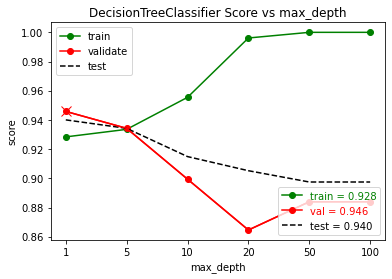

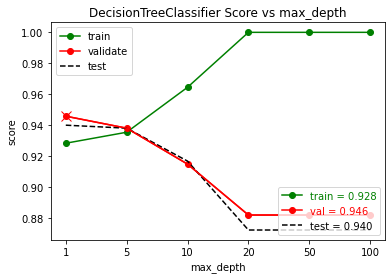

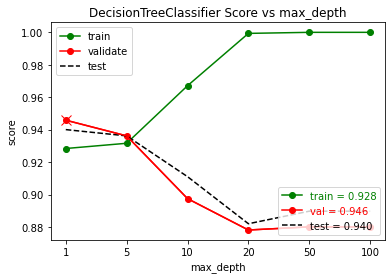

In [9]:
adjusted_parameter = 'max_depth'
adjusted_parameter_values = [1, 5, 10, 20, 50, 100]

DecisionTreeEstimators = train_estimators(drop_X_train, y_train,
                                            sklearn.tree.DecisionTreeClassifier,
                                            adjusted_parameter, adjusted_parameter_values,
                                            splitter='random',
                                            random_state=0)
plot_estimator_scores(DecisionTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        drop_X_train, y_train, drop_X_test, y_test, drop_X_val, y_val)

DecisionTreeEstimators = train_estimators(OE_X_train, y_train,
                                            sklearn.tree.DecisionTreeClassifier,
                                            adjusted_parameter, adjusted_parameter_values,
                                            splitter='random',
                                            random_state=0)
plot_estimator_scores(DecisionTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        OE_X_train, y_train, OE_X_test, y_test, OE_X_val, y_val)


DecisionTreeEstimators = train_estimators(OH_X_train, y_train,
                                            sklearn.tree.DecisionTreeClassifier,
                                            adjusted_parameter, adjusted_parameter_values,
                                            splitter='random',
                                            random_state=0)
plot_estimator_scores(DecisionTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        OH_X_train, y_train, OH_X_test, y_test, OH_X_val, y_val)

### Random Forest Classification

Training RandomForestClassifier(max_depth=1, random_state=0)...
Training RandomForestClassifier(max_depth=5, random_state=0)...
Training RandomForestClassifier(max_depth=10, random_state=0)...
Training RandomForestClassifier(max_depth=20, random_state=0)...
Training RandomForestClassifier(max_depth=50, random_state=0)...
Training RandomForestClassifier(max_depth=100, random_state=0)...
Training RandomForestClassifier(max_depth=1, random_state=0)...
Training RandomForestClassifier(max_depth=5, random_state=0)...
Training RandomForestClassifier(max_depth=10, random_state=0)...
Training RandomForestClassifier(max_depth=20, random_state=0)...
Training RandomForestClassifier(max_depth=50, random_state=0)...
Training RandomForestClassifier(max_depth=100, random_state=0)...
Training RandomForestClassifier(max_depth=1, random_state=0)...
Training RandomForestClassifier(max_depth=5, random_state=0)...
Training RandomForestClassifier(max_depth=10, random_state=0)...
Training RandomForestClassifi

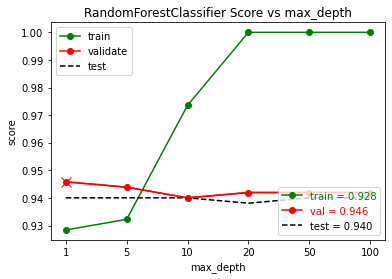

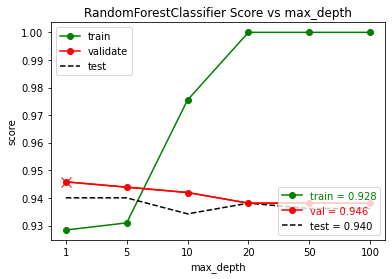

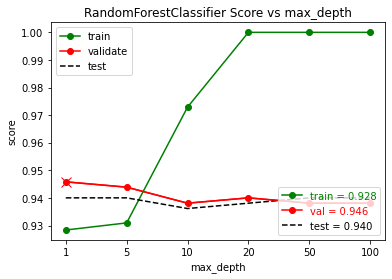

In [11]:
adjusted_parameter = 'max_depth'
adjusted_parameter_values = [1, 5, 10, 20, 50, 100]

RandomTreeEstimators = train_estimators(drop_X_train, y_train,
                                        sklearn.ensemble.RandomForestClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(RandomTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        drop_X_train, y_train, drop_X_test, y_test, drop_X_val, y_val)


RandomTreeEstimators = train_estimators(OE_X_train, y_train,
                                        sklearn.ensemble.RandomForestClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(RandomTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        OE_X_train, y_train, OE_X_test, y_test, OE_X_val, y_val)


RandomTreeEstimators = train_estimators(OH_X_train, y_train,
                                        sklearn.ensemble.RandomForestClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(RandomTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        OH_X_train, y_train, OH_X_test, y_test, OH_X_val, y_val)

### K-Nearest Neighbours Classification

Training KNeighborsClassifier(weights=uniform, n_neighbors=2)...
Training KNeighborsClassifier(weights=distance, n_neighbors=2)...
Training KNeighborsClassifier(weights=uniform, n_neighbors=2)...
Training KNeighborsClassifier(weights=distance, n_neighbors=2)...
Training KNeighborsClassifier(weights=uniform, n_neighbors=2)...
Training KNeighborsClassifier(weights=distance, n_neighbors=2)...


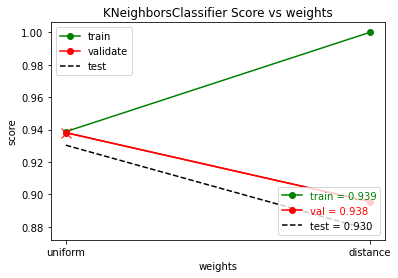

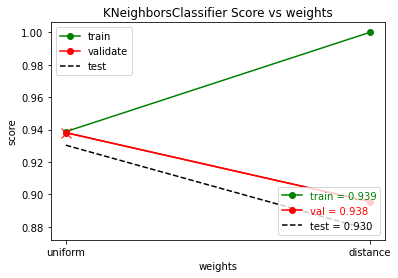

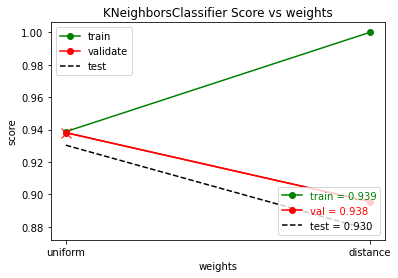

In [12]:
adjusted_parameter = 'weights'
adjusted_parameter_values = ['uniform','distance']

KNearestEstimators = train_estimators(drop_X_train, y_train,
                                        sklearn.neighbors.KNeighborsClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        drop_X_train, y_train, drop_X_test, y_test, drop_X_val, y_val)


KNearestEstimators = train_estimators(OE_X_train, y_train,
                                        sklearn.neighbors.KNeighborsClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        OE_X_train, y_train, OE_X_test, y_test, OE_X_val, y_val)


KNearestEstimators = train_estimators(OH_X_train, y_train,
                                        sklearn.neighbors.KNeighborsClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        OH_X_train, y_train, OH_X_test, y_test, OH_X_val, y_val)

Training KNeighborsClassifier(algorithm=auto, n_neighbors=2)...
Training KNeighborsClassifier(algorithm=ball_tree, n_neighbors=2)...
Training KNeighborsClassifier(algorithm=kd_tree, n_neighbors=2)...
Training KNeighborsClassifier(algorithm=brute, n_neighbors=2)...
Training KNeighborsClassifier(algorithm=auto, n_neighbors=2)...
Training KNeighborsClassifier(algorithm=ball_tree, n_neighbors=2)...
Training KNeighborsClassifier(algorithm=kd_tree, n_neighbors=2)...
Training KNeighborsClassifier(algorithm=brute, n_neighbors=2)...
Training KNeighborsClassifier(algorithm=auto, n_neighbors=2)...
Training KNeighborsClassifier(algorithm=ball_tree, n_neighbors=2)...
Training KNeighborsClassifier(algorithm=kd_tree, n_neighbors=2)...
Training KNeighborsClassifier(algorithm=brute, n_neighbors=2)...


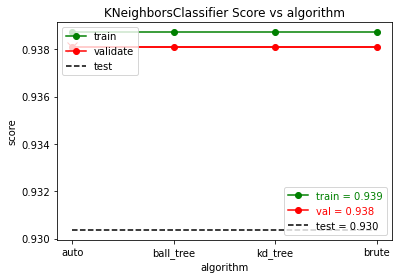

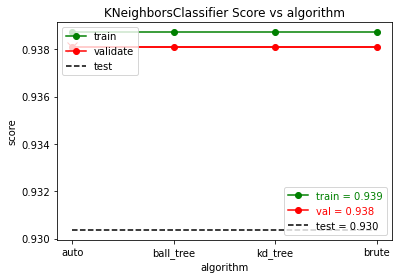

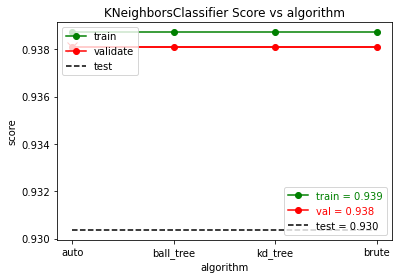

In [13]:
adjusted_parameter = 'algorithm'
adjusted_parameter_values = ['auto', 'ball_tree', 'kd_tree','brute']

KNearestEstimators = train_estimators(drop_X_train, y_train,
                                        sklearn.neighbors.KNeighborsClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        drop_X_train, y_train, drop_X_test, y_test, drop_X_val, y_val)


KNearestEstimators = train_estimators(OE_X_train, y_train,
                                        sklearn.neighbors.KNeighborsClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        OE_X_train, y_train, OE_X_test, y_test, OE_X_val, y_val)


KNearestEstimators = train_estimators(OH_X_train, y_train,
                                        sklearn.neighbors.KNeighborsClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        OH_X_train, y_train, OH_X_test, y_test, OH_X_val, y_val)

### Ada Boost Classification

Training AdaBoostClassifier(n_estimators=10, random_state=0)...
Training AdaBoostClassifier(n_estimators=50, random_state=0)...
Training AdaBoostClassifier(n_estimators=100, random_state=0)...
Training AdaBoostClassifier(n_estimators=500, random_state=0)...
Training AdaBoostClassifier(n_estimators=1000, random_state=0)...
Training AdaBoostClassifier(n_estimators=5000, random_state=0)...
Training AdaBoostClassifier(n_estimators=10, random_state=0)...
Training AdaBoostClassifier(n_estimators=50, random_state=0)...
Training AdaBoostClassifier(n_estimators=100, random_state=0)...
Training AdaBoostClassifier(n_estimators=500, random_state=0)...
Training AdaBoostClassifier(n_estimators=1000, random_state=0)...
Training AdaBoostClassifier(n_estimators=5000, random_state=0)...
Training AdaBoostClassifier(n_estimators=10, random_state=0)...
Training AdaBoostClassifier(n_estimators=50, random_state=0)...
Training AdaBoostClassifier(n_estimators=100, random_state=0)...
Training AdaBoostClassifier

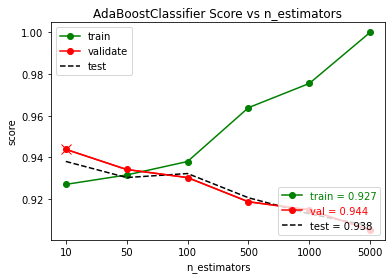

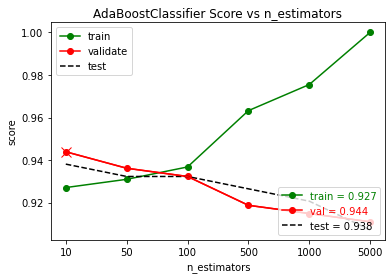

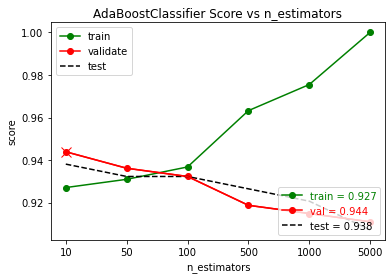

In [14]:
adjusted_parameter = 'n_estimators'
adjusted_parameter_values = [10, 50, 100, 500, 1000, 5000]

AdaBoostEstimators = train_estimators(drop_X_train, y_train,
                                        sklearn.ensemble.AdaBoostClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(AdaBoostEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        drop_X_train, y_train, drop_X_test, y_test, drop_X_val, y_val)


AdaBoostEstimators = train_estimators(OE_X_train, y_train,
                                        sklearn.ensemble.AdaBoostClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(AdaBoostEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        OE_X_train, y_train, OE_X_test, y_test, OE_X_val, y_val)


AdaBoostEstimators = train_estimators(OH_X_train, y_train,
                                        sklearn.ensemble.AdaBoostClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(AdaBoostEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        OH_X_train, y_train, OH_X_test, y_test, OH_X_val, y_val)

### Gaussian Naive Bayes Classification

In [15]:
drop_gaussian_nb = sklearn.naive_bayes.GaussianNB()
NaiveBayesEstimator = drop_gaussian_nb.fit(drop_X_train, y_train)
gaussian_nb_train_score = NaiveBayesEstimator.score(drop_X_train, y_train)
gaussian_nb_test_score =  NaiveBayesEstimator.score(drop_X_test, y_test)
gaussian_nb_val_score =  NaiveBayesEstimator.score(drop_X_val, y_val)
print(f'{gaussian_nb_train_score=}, {gaussian_nb_val_score=}, {gaussian_nb_test_score=}')

OE_gaussian_nb = sklearn.naive_bayes.GaussianNB()
NaiveBayesEstimator = OE_gaussian_nb.fit(OE_X_train, y_train)
gaussian_nb_train_score = NaiveBayesEstimator.score(OE_X_train, y_train)
gaussian_nb_test_score =  NaiveBayesEstimator.score(OE_X_test, y_test)
gaussian_nb_val_score =  NaiveBayesEstimator.score(OE_X_val, y_val)
print(f'{gaussian_nb_train_score=}, {gaussian_nb_val_score=}, {gaussian_nb_test_score=}')

OH_gaussian_nb = sklearn.naive_bayes.GaussianNB()
NaiveBayesEstimator = OH_gaussian_nb.fit(OH_X_train, y_train)
gaussian_nb_train_score = NaiveBayesEstimator.score(OH_X_train, y_train)
gaussian_nb_test_score =  NaiveBayesEstimator.score(OH_X_test, y_test)
gaussian_nb_val_score =  NaiveBayesEstimator.score(OH_X_val, y_val)
print(f'{gaussian_nb_train_score=}, {gaussian_nb_val_score=}, {gaussian_nb_test_score=}')

gaussian_nb_train_score=0.8993548387096775, gaussian_nb_val_score=0.9187620889748549, gaussian_nb_test_score=0.8878143133462283
gaussian_nb_train_score=0.8993548387096775, gaussian_nb_val_score=0.9187620889748549, gaussian_nb_test_score=0.8878143133462283
gaussian_nb_train_score=0.8993548387096775, gaussian_nb_val_score=0.9187620889748549, gaussian_nb_test_score=0.8878143133462283


### Neural Network Classification Through a Multi-Layer Perceptron

In [9]:
mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(), activation='relu',
                                            batch_size=100, max_iter=1000, learning_rate_init=0.01,
                                            momentum=0.4, random_state=0, verbose=True).fit(drop_X_train, y_train)

print(f'Training Score: {mlp.score(drop_X_train, y_train)}')
print(f'Testing Score: {mlp.score(drop_X_val, y_val)}')
print(f'Validation Score: {mlp.score(drop_X_test, y_test)}')

mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(16), activation='relu',
                                            batch_size=100, max_iter=1000, learning_rate_init=0.01,
                                            momentum=0.4, random_state=0, verbose=True).fit(drop_X_train, y_train)

print(f'Training Score: {mlp.score(drop_X_train, y_train)}')
print(f'Testing Score: {mlp.score(drop_X_val, y_val)}')
print(f'Validation Score: {mlp.score(drop_X_test, y_test)}')


Iteration 1, loss = 18.83411062
Iteration 2, loss = 4.10609139
Iteration 3, loss = 2.79388645
Iteration 4, loss = 10.23058548
Iteration 5, loss = 8.55639327
Iteration 6, loss = 6.53081482
Iteration 7, loss = 6.91305023
Iteration 8, loss = 4.19903537
Iteration 9, loss = 4.51656713
Iteration 10, loss = 3.91600888
Iteration 11, loss = 4.03963610
Iteration 12, loss = 5.72961245
Iteration 13, loss = 3.60670701
Iteration 14, loss = 5.26941925
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training Score: 0.9251612903225807
Testing Score: 0.941972920696325
Validation Score: 0.941972920696325
Iteration 1, loss = 7.39166717
Iteration 2, loss = 7.77253266
Iteration 3, loss = 8.14774925
Iteration 4, loss = 4.96064357
Iteration 5, loss = 7.30467890
Iteration 6, loss = 6.24192884
Iteration 7, loss = 5.92107956
Iteration 8, loss = 5.66412005
Iteration 9, loss = 5.41824764
Iteration 10, loss = 5.74498652
Iteration 11, loss = 5.78488135
Iteration 12, loss = 5

In [10]:
mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(), activation='relu',
                                            batch_size=100, max_iter=1000, learning_rate_init=0.01,
                                            momentum=0.4, random_state=0, verbose=True).fit(OE_X_train, y_train)

print(f'Training Score: {mlp.score(OE_X_train, y_train)}')
print(f'Testing Score: {mlp.score(OE_X_val, y_val)}')
print(f'Validation Score: {mlp.score(OE_X_test, y_test)}')

mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(16), activation='relu',
                                            batch_size=100, max_iter=1000, learning_rate_init=0.01,
                                            momentum=0.4, random_state=0, verbose=True).fit(OE_X_train, y_train)

print(f'Training Score: {mlp.score(OE_X_train, y_train)}')
print(f'Testing Score: {mlp.score(OE_X_val, y_val)}')
print(f'Validation Score: {mlp.score(OE_X_test, y_test)}')


Iteration 1, loss = 11.32352043
Iteration 2, loss = 2.88005611
Iteration 3, loss = 4.31209366
Iteration 4, loss = 3.77395786
Iteration 5, loss = 4.81028797
Iteration 6, loss = 3.37211888
Iteration 7, loss = 4.39156902
Iteration 8, loss = 5.56587524
Iteration 9, loss = 3.56013774
Iteration 10, loss = 3.50518338
Iteration 11, loss = 4.95002901
Iteration 12, loss = 3.94337719
Iteration 13, loss = 6.91772970
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training Score: 0.9251612903225807
Testing Score: 0.9400386847195358
Validation Score: 0.9381044487427466
Iteration 1, loss = 9.32498274
Iteration 2, loss = 6.02468997
Iteration 3, loss = 5.77974675
Iteration 4, loss = 4.55230400
Iteration 5, loss = 3.71721306
Iteration 6, loss = 5.29244110
Iteration 7, loss = 3.84345942
Iteration 8, loss = 4.63024835
Iteration 9, loss = 4.79606825
Iteration 10, loss = 4.16484833
Iteration 11, loss = 3.61754964
Iteration 12, loss = 4.15035073
Iteration 13, loss = 

In [11]:
mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(), activation='relu',
                                            batch_size=100, max_iter=1000, learning_rate_init=0.01,
                                            momentum=0.4, random_state=0, verbose=True).fit(OH_X_train, y_train)

print(f'Training Score: {mlp.score(OH_X_train, y_train)}')
print(f'Testing Score: {mlp.score(OH_X_val, y_val)}')
print(f'Validation Score: {mlp.score(OH_X_test, y_test)}')

mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(16), activation='relu',
                                            batch_size=100, max_iter=1000, learning_rate_init=0.01,
                                            momentum=0.4, random_state=0, verbose=True).fit(OH_X_train, y_train)

print(f'Training Score: {mlp.score(OH_X_train, y_train)}')
print(f'Testing Score: {mlp.score(OH_X_val, y_val)}')
print(f'Validation Score: {mlp.score(OH_X_test, y_test)}')


Iteration 1, loss = 16.00783845
Iteration 2, loss = 3.45046643
Iteration 3, loss = 7.11319897
Iteration 4, loss = 6.12334945
Iteration 5, loss = 6.10286459
Iteration 6, loss = 5.65091456
Iteration 7, loss = 3.58343199
Iteration 8, loss = 4.36613816
Iteration 9, loss = 5.94547820
Iteration 10, loss = 6.02743583
Iteration 11, loss = 3.64917859
Iteration 12, loss = 5.82632578
Iteration 13, loss = 4.20734481
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training Score: 0.9193548387096774
Testing Score: 0.9361702127659575
Validation Score: 0.9381044487427466
Iteration 1, loss = 7.60502941
Iteration 2, loss = 7.30649907
Iteration 3, loss = 7.78429943
Iteration 4, loss = 10.08154978
Iteration 5, loss = 5.79821480
Iteration 6, loss = 6.44019202
Iteration 7, loss = 5.49851519
Iteration 8, loss = 5.10704854
Iteration 9, loss = 5.21602549
Iteration 10, loss = 4.34091314
Iteration 11, loss = 3.91709781
Iteration 12, loss = 5.14202947
Iteration 13, loss =